# PCA 範例
* 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=123)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [3]:
# 執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=False)
grid_search.fit(X_digits, y_digits)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=...m_state=123, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pca__n_components': [4, 10, 20, 30, 40, 50, 64], 'logistic__alpha': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [4]:
print('Best Accuracy => CV score: {:.3f}'.format(grid_search.best_score_))
print('Best Parameters => {}'.format(grid_search.best_params_))

Best Accuracy => CV score: 0.918
Best Parameters => {'logistic__alpha': 0.01, 'pca__n_components': 30}


In [5]:
pca.fit(X_digits)

plot1_x = np.arange(1, len(pca.explained_variance_) + 1)
plot1_y = pca.explained_variance_

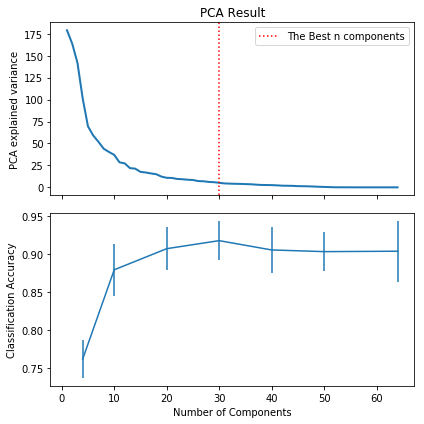

In [10]:
# 繪製不同 components 的 PCA explained variance ratio

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(6, 6), sharex=True)
ax1.plot(plot1_x, plot1_y, linewidth=2)
ax1.set_title('PCA Result')
ax1.set_ylabel('PCA explained variance')

ax1.axvline(grid_search.best_estimator_.named_steps['pca'].n_components, color='r', linestyle=':', label='The Best n components')
ax1.legend()

# 繪製不同採樣點的 accuracy
results_df = pd.DataFrame(grid_search.cv_results_)
component_col = 'param_pca__n_components'
best_clf = results_df.groupby(component_col).apply(lambda x: x.nlargest(1, 'mean_test_score'))

best_clf.plot(x=component_col, y='mean_test_score', yerr='std_test_score', ax=ax2, legend=False)
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Classification Accuracy')

plt.tight_layout()
plt.show()